# 1. Importing Data

In [31]:
# Import libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy

In [32]:
path = r'/Users/nurgul/Instacart Basket Analysis'

In [33]:
# Importing Data set customers.csv
df_customers=pd.read_csv(os.path.join(path, '02 Data', 'Original Data','customers.csv'), index_col=False) 

# 2. Wraggling Data

In [34]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       206209 non-null  int64 
 1   First Name    194950 non-null  object
 2   Surnam        206209 non-null  object
 3   Gender        206209 non-null  object
 4   STATE         206209 non-null  object
 5   Age           206209 non-null  int64 
 6   date_joined   206209 non-null  object
 7   n_dependants  206209 non-null  int64 
 8   fam_status    206209 non-null  object
 9   income        206209 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 15.7+ MB


In [35]:
df_customers.head()

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [36]:
# Renaming several columns 
df_customers.rename(columns = {'First Name' : 'first name', "Surnam": 'surname', 'Gender': 'gender', 'STATE': 'state', 'Age': 'age'}, inplace = True)

In [37]:
df_customers.head()

,user_id,first name,surname,gender,state,age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


It was decided to rename several columns 

# 3. Data Consistency Checks

In [38]:
# Checking for columns that have mixed data type
for col in df_customers.columns.tolist():
    weird = (df_customers[[col]].map(type) != df_customers[[col]].iloc[0].apply(type)).any(axis = 1)
    
    if len (df_customers[weird]) > 0:
        print (col)

first name


In [39]:
# Changing data type first_name to string as its a mixed type
df_customers['first name'] = df_customers['first name'].astype('str')

In [40]:
df_customers['first name'].dtype

dtype('O')

First name had a mixed data tyoe chnaged it to string 

In [41]:
df_customers.shape

(206209, 10)

In [42]:
df_customers.describe()

,user_id,age,n_dependants,income
count,206209.000000,206209.000000,206209.000000,206209.000000
mean,103105.000000,49.501646,1.499823,94632.852548
std,59527.555167,18.480962,1.118433,42473.786988
min,1.000000,18.000000,0.000000,25903.000000
25%,51553.000000,33.000000,0.000000,59874.000000
50%,103105.000000,49.000000,1.000000,93547.000000
75%,154657.000000,66.000000,3.000000,124244.000000
max,206209.000000,81.000000,3.000000,593901.000000


In [43]:
# Checking columns with missing values
df_customers.isnull().sum()

user_id         0
first name      0
surname         0
gender          0
state           0
age             0
date_joined     0
n_dependants    0
fam_status      0
income          0
dtype: int64

No missing values found

In [44]:
#Q.7 Running a check for duplicate values 
#Finding full duplicates
df_customers_dups=df_customers[df_customers.duplicated()]

In [45]:
df_customers_dups

,user_id,first name,surname,gender,state,age,date_joined,n_dependants,fam_status,income


No duplicates found

### Income 

In [46]:
# Cheking income 
df_customers['income'].describe()

count    206209.000000
mean      94632.852548
std       42473.786988
min       25903.000000
25%       59874.000000
50%       93547.000000
75%      124244.000000
max      593901.000000
Name: income, dtype: float64

/Users/nurgul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nurgul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='income', ylabel='income'>

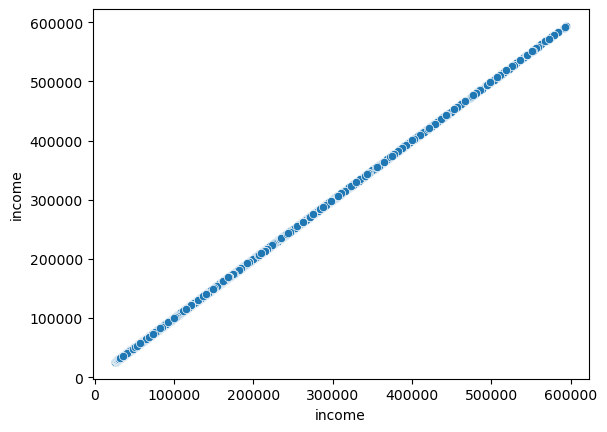

In [47]:
#Creating scatterplot 
sns.scatterplot(x='income', y='income', data=df_customers)

No outliers and missing values found. Right skewed 

### Gender 

In [48]:
#checking value types and counts of gender
df_customers['gender'].value_counts(dropna=False)

gender
Male      104067
Female    102142
Name: count, dtype: int64

No changes required 

### State 

In [49]:
df_customers['state'].nunique()

51

In [50]:
# Checking duplicates and error names
df_customers['state'].value_counts(dropna=False)

state
Florida                 4044
Colorado                4044
Illinois                4044
Alabama                 4044
District of Columbia    4044
Hawaii                  4044
Arizona                 4044
Connecticut             4044
California              4044
Indiana                 4044
Arkansas                4044
Alaska                  4044
Delaware                4044
Iowa                    4044
Idaho                   4044
Georgia                 4044
Wyoming                 4043
Mississippi             4043
Oklahoma                4043
Utah                    4043
New Hampshire           4043
Kentucky                4043
Maryland                4043
Rhode Island            4043
Massachusetts           4043
Michigan                4043
New Jersey              4043
Kansas                  4043
South Dakota            4043
Minnesota               4043
Tennessee               4043
New York                4043
Washington              4043
Louisiana               4043
Montana 

51 states included. Customeres are split between 4044 and 4043

### Age 

Text(0.5, 1.0, 'Age Distribution')

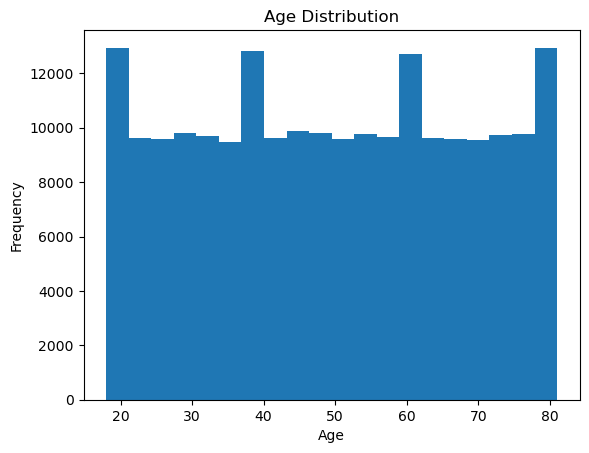

In [51]:
# checking distribution of age
df_customers['age'].plot.hist(bins=20, xlabel='Age')
plt.title('Age Distribution', fontsize=12)

No missing values in age. Age peaks: 20, 40, 60, 80. No outliers found

### Number of depandants  

In [52]:
# value counts of n_dependants
df_customers['n_dependants'].value_counts(dropna=False)

n_dependants
0    51602
3    51594
1    51531
2    51482
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Dependants Distribution')

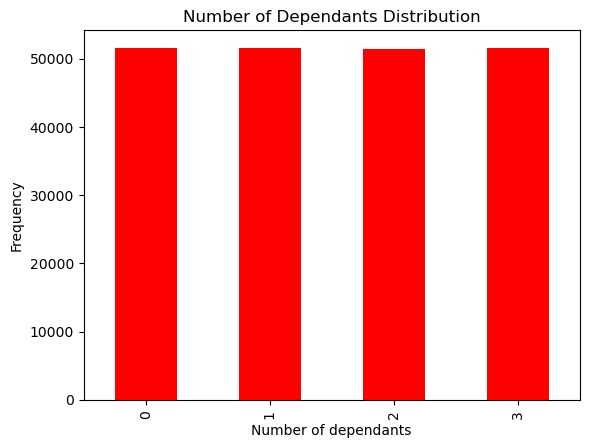

In [53]:
# checking distribution of n_dependants
df_customers['n_dependants'].value_counts(dropna=True).sort_index().plot.bar(color=['red'], ylabel='Frequency', 
xlabel='Number of dependants')
plt.title('Number of Dependants Distribution', fontsize=12)

Numbers of dependants are equally distributed

### Family status 

In [54]:
df_customers['fam_status'].value_counts(dropna=False)

fam_status
married                             144906
single                               33962
divorced/widowed                     17640
living with parents and siblings      9701
Name: count, dtype: int64

Text(0.5, 1.0, 'Family Distribution')

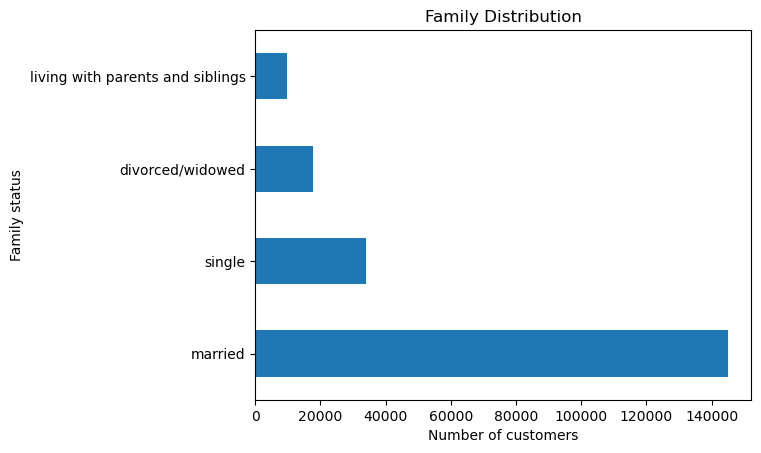

In [55]:
#plot bar chart to see the distribution of the fam_status values
df_customers['fam_status'].value_counts(dropna=False).plot.barh(xlabel="Number of customers", ylabel='Family status')
plt.title('Family Distribution', fontsize=12)

No missing vaues. Majority of customers are married and least amount are living with parentsand siblings

# 5. Combining Orders-Product with Customers

In [56]:
# Importing Data set ords_prods_merge_updated.pkl
df_ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge_updated.pkl'))

In [57]:
df_ords_prods_merge.shape

(32404859, 26)

In [58]:
df_ords_prods_merge['prices'] = df_ords_prods_merge['prices'].astype('float32')

In [59]:
df_ords_prods_merge['mean_expenses'] = df_ords_prods_merge['prices'].astype('float32')

In [60]:
df_ords_prods_merge.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,hour_of_day_ordered,...,Busiest_day,busiest_day,busiest_peroid_of_the_day,max_order,loyalty_flag,mean_spend,spender_flag,median_order_frequency,order_frequency_flag,mean_expenses
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Regulary busy,Regulary busy,Most orders,32,Regular customer,6.935811,High spender,8.0,Frequent custome,5.8
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Regulary busy,Regulary busy,Average orders,32,Regular customer,6.935811,High spender,8.0,Frequent custome,5.8
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Busiest day,Busiest days,Average orders,5,New customer,7.930208,High spender,8.0,Frequent custome,5.8
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Regulary busy,Slowest days,Most orders,3,New customer,4.972414,High spender,9.0,Frequent custome,5.8
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Least busy,Slowest days,Average orders,3,New customer,4.972414,High spender,9.0,Frequent custome,5.8


In [61]:
df_ords_prods_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 27 columns):
 #   Column                     Dtype   
---  ------                     -----   
 0   product_id                 int64   
 1   product_name               object  
 2   aisle_id                   int64   
 3   department_id              int64   
 4   prices                     float32 
 5   order_id                   int64   
 6   user_id                    int64   
 7   order_number               int64   
 8   orders_day_of_week         int64   
 9   hour_of_day_ordered        int64   
 10  days_since_prior_order     float64 
 11  add_to_cart_order          int64   
 12  reordered                  int64   
 13  _merge                     category
 14  merge_indicator            category
 15  price_range_loc            object  
 16  busiest_dat                object  
 17  Busiest_day                object  
 18  busiest_day                object  
 19  busiest_peroid_of_t

In [ ]:
# droping: _merge, aisle_id and merge_indicator columns in df_ords_prod_merge 
df_ords_prods_merge.drop(columns=['_merge', 'aisle_id', 'merge_indicator'], inplace=True)

In [ ]:
df_ords_prods_merge.info()

In [ ]:
#Identifying outliers in prices column 
df_ords_prods_merge.loc[df_ords_prods_merge['prices'] > 100]

In [ ]:
# Turning outliers to missing values
df_ords_prods_merge.loc[df_ords_prods_merge['prices'] > 100, 'prices'] = np.nan

In [ ]:
df_ords_prods_merge['prices'].max()

In [ ]:
# Merging ords_prods with customers using user_id
df_ords_prods_customers_left = df_ords_prods_merge.merge(df_customers, on=['user_id'], indicator=True)

In [ ]:
df_ords_prods_customers_left.info()

In [ ]:
df_ords_prods_customers_left.drop(columns=['_merge'], inplace=True)

In [ ]:
df_ords_prods_customers_left.shape

# 5. Export Customer File to PKL

In [ ]:
# Export data to pkl
df_ords_prods_customers_left.to_pickle(os.path.join(path,'02 Data/Prepared Data/ords_prods_customers_left.pkl'))